In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\practice project\\paid projject\\4th\\Phishing_Email(1) (1).csv")

In [3]:
df.head(25)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [4]:
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [5]:
num_duplicates = df.duplicated().sum()
print("Number of duplicated observations:", num_duplicates)

Number of duplicated observations: 0


In [6]:
# as per above absovations there are no duplicated values in the data set but we are going to excaute the remove code also 

In [7]:
df_unique = df.drop_duplicates(subset=['Email Text'])
print("Shape before removing duplicates:", df.shape)
print("Shape after removing duplicates:", df_unique.shape)

Shape before removing duplicates: (18650, 3)
Shape after removing duplicates: (17538, 3)


In [8]:
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values)
df_cleaned = df.dropna()
print("\nShape before removing missing values:", df.shape)
print("Shape after removing missing values:", df_cleaned.shape)



Number of missing values per column:
Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

Shape before removing missing values: (18650, 3)
Shape after removing missing values: (18634, 3)


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())


                                          Email Text      Email Type
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email
1  the other side of * galicismos * * galicismo *...      Safe Email
2  re : equistar deal tickets are you still avail...      Safe Email
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email
4  software at incredibly low prices ( 86 % lower...  Phishing Email


In [10]:
email_counts = df['Email Type'].value_counts()
print("Number of Safe and Phishing emails:")
print(email_counts)

Number of Safe and Phishing emails:
Safe Email        11322
Phishing Email     7328
Name: Email Type, dtype: int64


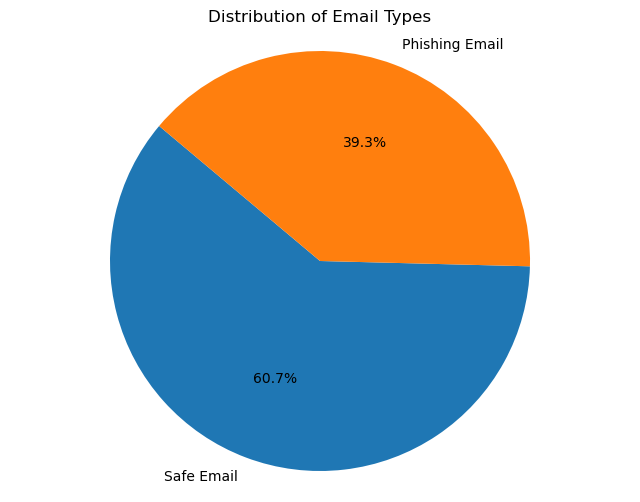

In [11]:
plt.figure(figsize=(8, 6))
plt.pie(email_counts, labels=email_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Email Types')
plt.axis('equal') 
plt.show()


In [12]:
email_text_stats = df['Email Text'].describe()
email_type_counts = df['Email Type'].value_counts()
print("Descriptive statistics for Email Text:")
print(email_text_stats)
print("\nFrequency of Email Type:")
print(email_type_counts)

Descriptive statistics for Email Text:
count     18634
unique    17537
top       empty
freq        533
Name: Email Text, dtype: object

Frequency of Email Type:
Safe Email        11322
Phishing Email     7328
Name: Email Type, dtype: int64


The descriptive statistics for the 'Email Text' column reveal that out of 18,634 observations, there are 17,537 unique email texts. The most frequent email text is labeled as 'empty', occurring 533 times. As for the 'Email Type' column, there are 11,322 occurrences of Safe emails and 7,328 occurrences of Phishing emails. These statistics provide insights into the variability and distribution of email texts, as well as the balance between Safe and Phishing emails in the dataset. The presence of a significant number of unique email texts suggests a diverse range of content, while the frequency distribution of email types indicates the prevalence of each category.

In [13]:
df['Email Type'] = df['Email Type'].replace({'Safe Email': 0, 'Phishing Email': 1})
print(df.head())

                                          Email Text  Email Type
0  re : 6 . 1100 , disc : uniformitarianism , re ...           0
1  the other side of * galicismos * * galicismo *...           0
2  re : equistar deal tickets are you still avail...           0
3  \nHello I am your hot lil horny toy.\n    I am...           1
4  software at incredibly low prices ( 86 % lower...           1


In [14]:
df['message_len'] = df['Email Text'].apply(lambda x: len(str(x)))
print(df.head())

                                          Email Text  Email Type  message_len
0  re : 6 . 1100 , disc : uniformitarianism , re ...           0         1030
1  the other side of * galicismos * * galicismo *...           0          479
2  re : equistar deal tickets are you still avail...           0         1245
3  \nHello I am your hot lil horny toy.\n    I am...           1          688
4  software at incredibly low prices ( 86 % lower...           1          441


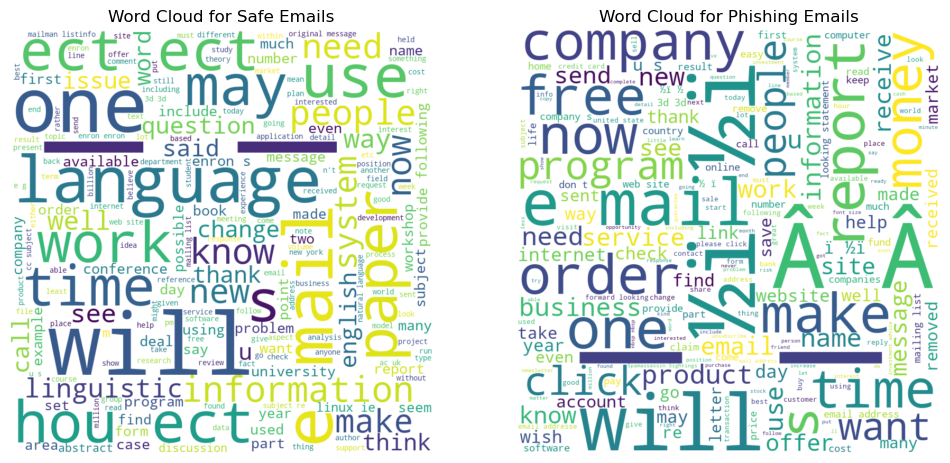

In [15]:
df['Email Text'] = df['Email Text'].fillna('')
safe_emails = df[df['Email Type'] == 0]['Email Text']
phishing_emails = df[df['Email Type'] == 1]['Email Text']
safe_wordcloud = WordCloud(width=800, height=800, 
                           background_color='white', 
                           stopwords=None, 
                           min_font_size=10).generate(' '.join(safe_emails))
phishing_wordcloud = WordCloud(width=800, height=800, 
                               background_color='white', 
                               stopwords=None, 
                               min_font_size=10).generate(' '.join(phishing_emails))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(safe_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Safe Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(phishing_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Phishing Emails')
plt.axis('off')

plt.show()

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def clean_text(email_text):
    if isinstance(email_text, str): 
        email_text_no_punct = ''.join([char for char in email_text if char not in string.punctuation])
        words = word_tokenize(email_text_no_punct.lower())  # Convert to lowercase while tokenizing
        clean_words = [word for word in words if word not in stopwords.words('english')]
        clean_msg = ' '.join(clean_words)
        return clean_msg
    else:
        return '' 

df = pd.read_csv('C:\\Users\\hp\\Desktop\\practice project\\paid projject\\4th\\Phishing_Email(1) (1).csv')

df['clean_msg'] = df['Email Text'].apply(clean_text)

X = df['clean_msg'] 
y = df['Email Type']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13055,)
X_test shape: (5595,)
y_train shape: (13055,)
y_test shape: (5595,)


In [18]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
print("Shape of X_train_counts:", X_train_counts.shape)
print("Shape of X_test_counts:", X_test_counts.shape)

Shape of X_train_counts: (13055, 164516)
Shape of X_test_counts: (5595, 164516)


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer


In [20]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (13055, 164516)
Shape of X_test_tfidf: (5595, 164516)


In [21]:
from sklearn.naive_bayes import MultinomialNB


In [22]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


MultinomialNB()

In [23]:
y_pred = clf.predict(X_test_tfidf)
accuracy = (y_pred == y_test).mean()
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9252904378909741


In [24]:
from sklearn.metrics import confusion_matrix


In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1856  359]
 [  59 3321]]


In [26]:
from sklearn.metrics import roc_auc_score


In [27]:
y_prob = clf.predict_proba(X_test_tfidf)[:, 1]

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

AUC Score: 0.993608265323841


The multinomial Naive Bayes classifier was trained using the default parameters on a dataset consisting of email text classified as either Safe or Phishing. Upon evaluating the model's performance on the test sample, we observed an accuracy of 92.53%. This indicates that the classifier correctly predicted the email type (Safe or Phishing) for approximately 92.53% of the test emails.

The confusion matrix provides additional insight into the model's performance by breaking down the predictions into four categories: true positive (1856), true negative (3321), false positive (359), and false negative (59). These numbers reveal that the classifier accurately classified a large number of Safe emails (true negatives) and Phishing emails (true positives), while making relatively few misclassifications.

Furthermore, the AUC score, which measures the classifier's ability to distinguish between Safe and Phishing emails, was found to be 0.9936. This high AUC score suggests that the classifier performed exceptionally well in discriminating between the two classes, with a minimal chance of misclassification.

Overall, these results demonstrate the effectiveness of the multinomial Naive Bayes classifier in detecting and classifying phishing emails based on their text content. The high accuracy, along with the strong performance metrics such as the confusion matrix and AUC score, underscores the model's reliability and potential for real-world application in email security.